In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Tanjiaalam/carbon/main/data_cleanednew.csv")


In [ ]:
X = df.drop("co2_per_cap", axis=1)
y = df["co2_per_cap"]

In [ ]:
X = pd.get_dummies(df["country"], prefix="country")

# Extract the year from the date and store it as a new column
X["year"] = pd.to_datetime(df["year"]).dt.year

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as Imputer

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

imputer = Imputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann = Sequential()                         
ann.add(Dense(units=6, activation="relu"))  
ann.add(Dense(units=6, activation="relu"))  
ann.add(Dense(units=1))

In [ ]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 37.5074 - val_loss: 35.0000
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 32.1995 - val_loss: 29.2732
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 26.1936 - val_loss: 23.0899
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 20.7214 - val_loss: 17.8938
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 16.3052 - val_loss: 14.2465
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 13.1628 - val_loss: 11.3154
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 10.6881 - val_loss: 9.2234
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 8.8172 - val_loss: 7.5246
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 7.2979 - val_loss: 6.1402
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 6.1502 - val_loss: 5.1

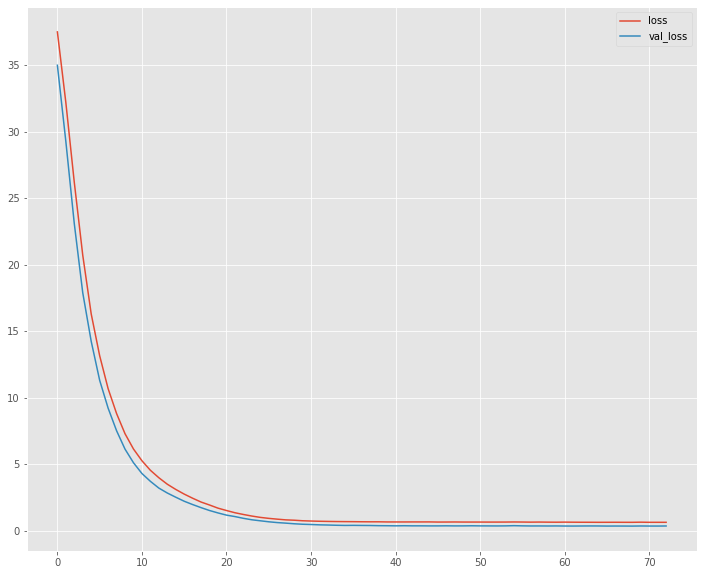

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [ ]:
ann.evaluate(X_train,y_train)

43/43 [==============================] - 0s 1ms/step - loss: 0.6188


0.6188274025917053

In [ ]:
ann.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.3627


0.36269640922546387

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])

11/11 [==============================] - 0s 1ms/step


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


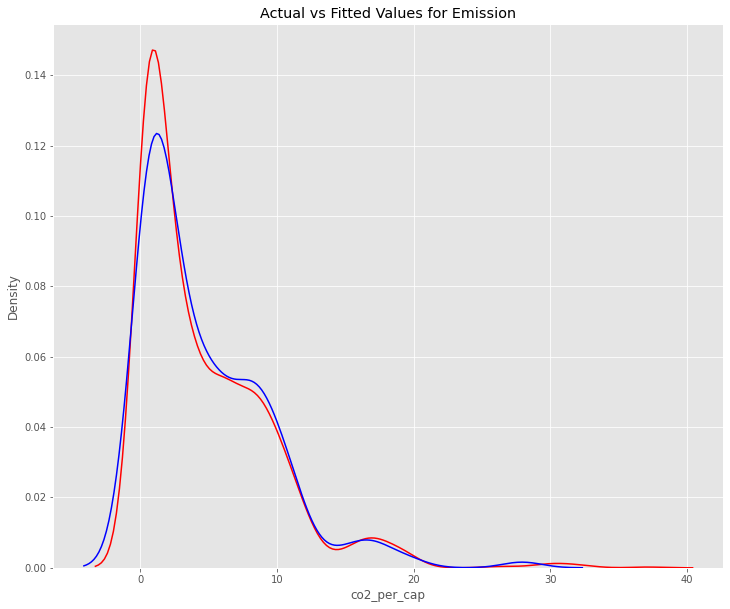

In [ ]:
plt.figure(figsize=(12, 10))
import seaborn as sns
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Emission')

plt.show()
plt.close()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Actual Values')

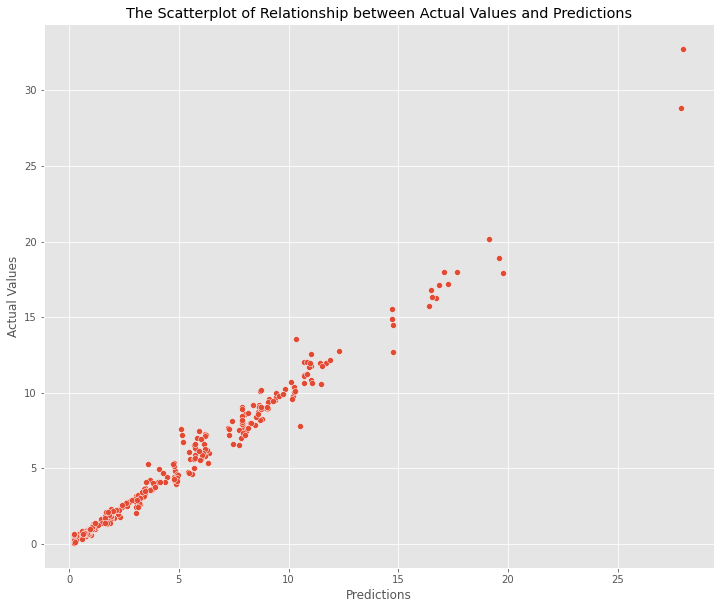

In [ ]:
plt.figure(figsize=(12,10))
import seaborn as sns
sns.scatterplot(np.ravel(predictions),y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [ ]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.35218584516484824
MSE: 0.3626965019222247
RMSE: 0.6022428927951119


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.9846861114377694